# Application web avec Flask

Flask est un micro framework open-source de développement web en Python. Il est classé comme microframework car il est très léger. Flask a pour objectif de garder un noyau simple mais extensible.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Flask_logo.svg/1200px-Flask_logo.svg.png'>


In [1]:
from flask import Flask, render_template, request
from functions import date_time, pred_and_show_image
import warnings
import urllib.request
import tensorflow as tf
import requests

warnings.filterwarnings('ignore')
date = date_time()
app = Flask(__name__)

# Page d'acceuil
@app.route('/', methods=['GET'])
def app_home():
    #1. Afficher sur le front la date et l'heure

    return render_template("index.html", date=date)


# Page d'action
@app.route('/submit/', methods=['POST', 'GET'])
def result():


    # 2. Charger le model

    model = tf.keras.models.load_model("model.h5")
    print("Model loaded")

    if request.method == 'POST':
        path = "./static/assets/img.jpeg"
        try:
            image_url = request.form['input_text']
            image = requests.get(image_url,allow_redirects=True)
            
            open(path, 'wb').write(image.content)
            # plt.imshow(plt.imread('./img.jpeg'))
            # plt.show()
            result = pred_and_show_image(model, "./img.jpeg")
            
            
            # 3. Récupérer l'image uploadée par l'utilisateur puis obtenir la prédiction du model

            # à_compléter : Obtenir l'image uploadée par l'utilisateur
            # à_compléter : Sauvegarder l'image dans le dossier static/assets
            # à_compléter : Préparer l'image pour le model
            # à_compléter : Prédire la classe de l'image


            return render_template("submit.html",
                                   
                                   # 4. Afficher la prédiction du model sur le front
                                    
                                    #à_compléter : Envoyer la prédiction du model,
                                    prediction=result[0],
                                    #à_compléter : Envoyer le chemin de l'image à afficher
                                    img = image_url,
                                    #à_compléter :  La probabilité de la prédiction
                                    accuracy = result[1]
                                  )       
        except:
            return render_template("submit.html")

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [01/Jun/2023 10:41:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2023 10:41:38] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:41:38] "GET /static/js/scripts.js HTTP/1.1" 304 -


Model loaded
1/1 [==============================] - 0s 197ms/step


127.0.0.1 - - [01/Jun/2023 10:41:54] "POST /submit/ HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2023 10:41:54] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:41:54] "GET /static/js/scripts.js HTTP/1.1" 304 -


Prediction : Chat
Probabilité : 0.9978866577148438
Model loaded
1/1 [==============================] - 0s 237ms/step


127.0.0.1 - - [01/Jun/2023 10:49:37] "POST /submit/ HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2023 10:49:37] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:49:37] "GET /static/js/scripts.js HTTP/1.1" 304 -


Prediction : Chat
Probabilité : 0.9978866577148438


127.0.0.1 - - [01/Jun/2023 10:49:37] "GET /static/assets/favicon.ico HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:49:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2023 10:49:42] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:49:42] "GET /static/js/scripts.js HTTP/1.1" 304 -


Model loaded
1/1 [==============================] - 0s 223ms/step


127.0.0.1 - - [01/Jun/2023 10:49:50] "POST /submit/ HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2023 10:49:50] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [01/Jun/2023 10:49:50] "GET /static/js/scripts.js HTTP/1.1" 304 -


Prediction : Chat
Probabilité : 0.9978866577148438


# Request et Response d'une URL

In [1]:
# Downloading the file from Azure from url : https://catdog.file.core.windows.net/cat/model.h5

import requests
url = 'https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8fA%3D%3D&w=1000&q=80'
r = requests.get(url, allow_redirects=True)

open('img.jpeg', 'wb').write(r.content)

247743

## Import du model 

In [2]:
#Local 
import tensorflow as tf


model = tf.keras.models.load_model('model.h5')

In [3]:
#Azure Blob Storage

print("Downloading model")
url = 'https://catdog.blob.core.windows.net/blob/model.h5'
r = requests.get(url, allow_redirects=True)
open('model', 'wb').write(r.content)
print("Loading model")
model = tf.keras.models.load_model('model.h5')

Loading model


# Prédiction du modèle

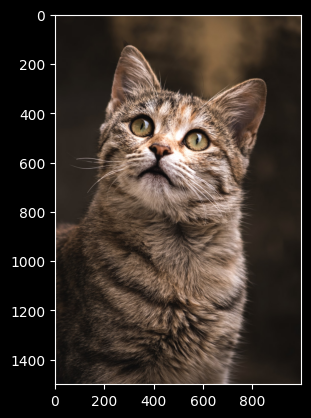

1/1 [==============================] - 0s 389ms/step
Prediction : Chat
Probabilité : 0.9978866577148438


('Chat', 0.99788666)

In [4]:
from functions import pred_and_show_image
import matplotlib.pyplot as plt

path = "./img.jpeg"


#show image
plt.imshow(plt.imread(path))
plt.show()


pred_and_show_image(model, "./img.jpeg")